# ANN for image classification:

In [4]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import cv2

In [10]:
folder_dir=r'screen\images'
#r"D:\Downloads\cluster\cluster_qt\screen\images  "
#"C:\\Users\\Biancaa. R\\Downloads\\cluster\\cluster_qt\\screen\\images"


In [11]:
import os
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg") or file.endswith("png"):
            label.append(folder) 
            #for saving what all classes we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

In [12]:
data_arr=np.array(data)
label_arr=np.array(label)

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [14]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5) #becaue we have 5 different categories
x=data_arr/255

In [15]:
print (x[0])

[[[0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  ...
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]]

 [[0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  ...
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]]

 [[0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  ...
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]]

 ...

 [[0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  ...
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]]

 [[0.94509804 1.         1.        ]
  [0.94509804 1.         1.        ]


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
x_train.shape

(3108, 128, 128, 3)

In [51]:
from tensorflow import keras

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),  # Include the channel dimension
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # Adjusted for 5 output classes
])



In [45]:
# summary of model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 49152)             0         
                                                                 
 dense_40 (Dense)            (None, 256)               12583168  
                                                                 
 dense_41 (Dense)            (None, 100)               25700     
                                                                 
 dense_42 (Dense)            (None, 70)                7070      
                                                                 
 dense_43 (Dense)            (None, 50)                3550      
                                                                 
 dense_44 (Dense)            (None, 20)                1020      
                                                                 
 dense_45 (Dense)            (None, 5)                

In [50]:
x_test.shape
y_train.shape
y_test.shape

(778, 5)

In [52]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
# fitting model

model_history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 50)

Epoch 1/50
98/98 [==============================] - 10s 88ms/step - loss: 1.2080 - accuracy: 0.5627 - val_loss: 1.0389 - val_accuracy: 0.6594
Epoch 2/50
98/98 [==============================] - 8s 80ms/step - loss: 1.0702 - accuracy: 0.6174 - val_loss: 1.0322 - val_accuracy: 0.6504
Epoch 3/50
98/98 [==============================] - 8s 82ms/step - loss: 1.0396 - accuracy: 0.6393 - val_loss: 1.0531 - val_accuracy: 0.6272
Epoch 4/50
98/98 [==============================] - 8s 83ms/step - loss: 1.0446 - accuracy: 0.6184 - val_loss: 1.0106 - val_accuracy: 0.6864
Epoch 5/50
98/98 [==============================] - 8s 82ms/step - loss: 1.0284 - accuracy: 0.6171 - val_loss: 1.0293 - val_accuracy: 0.6324
Epoch 6/50
98/98 [==============================] - 8s 83ms/step - loss: 1.0078 - accuracy: 0.6355 - val_loss: 0.9677 - val_accuracy: 0.6710
Epoch 7/50
98/98 [==============================] - 8s 83ms/step - loss: 0.9535 - accuracy: 0.6847 - val_loss: 0.9401 - val_accuracy: 0.6761
Epoch 8/50
9

In [54]:

model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 7ms/step - loss: 0.8992 - accuracy: 0.7018


[0.8991748690605164, 0.7017995119094849]

In [56]:
!pip install pydot

In [57]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


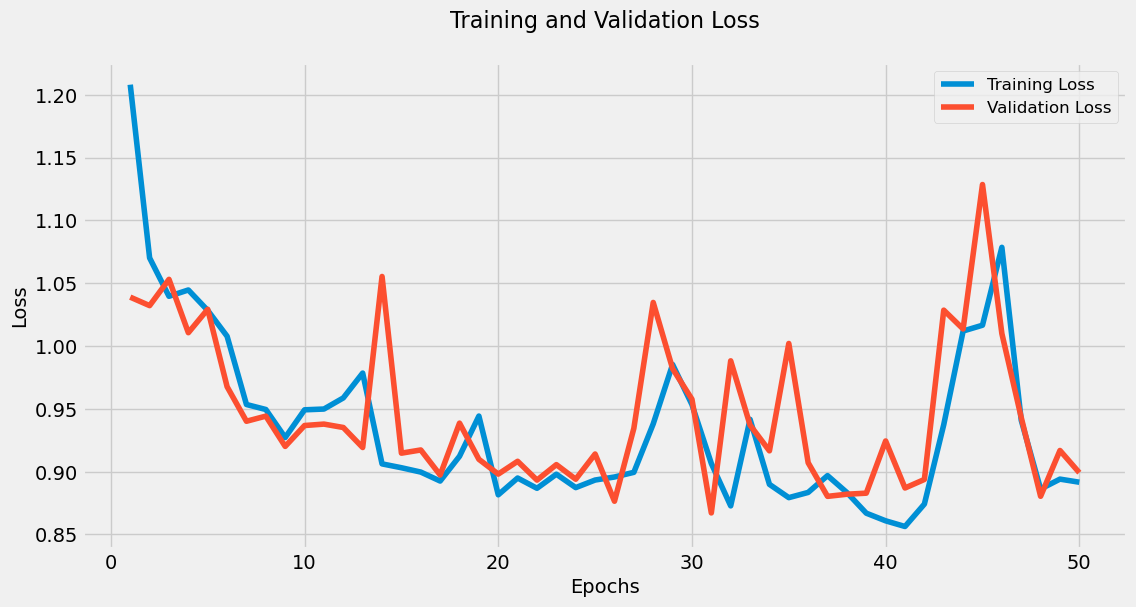

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

# Extract loss and validation loss
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)  # Ensure it matches the number of epochs

# Plot training and validation loss
sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')

# Add titles and labels
plt.title('Training and Validation Loss\n', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()


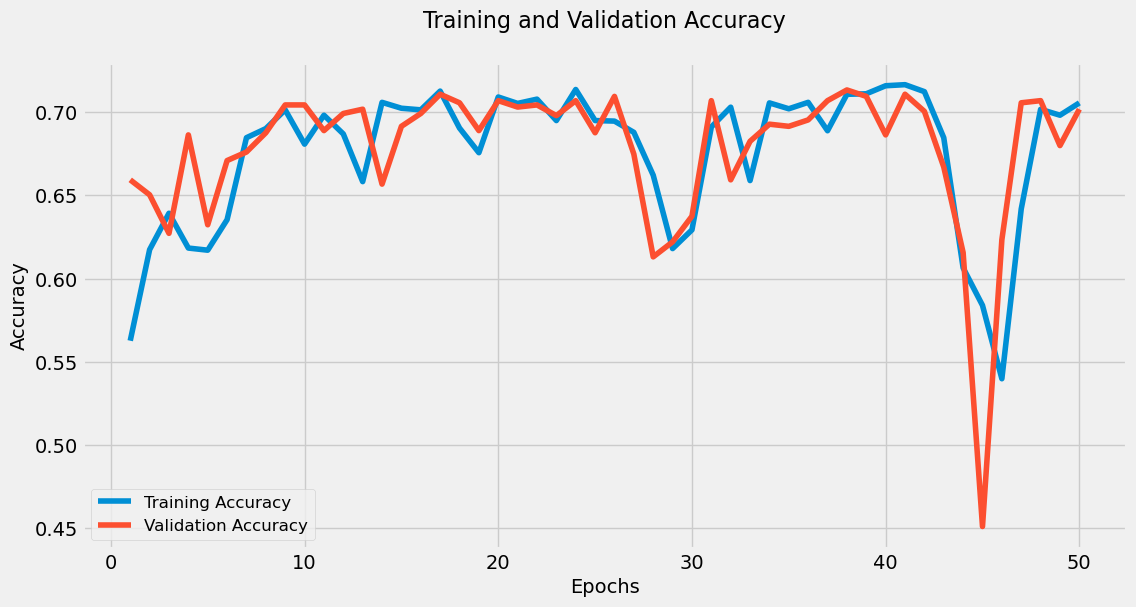

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Extract accuracy and validation accuracy
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)  # Ensure it matches the number of epochs

# Plot training and validation accuracy
sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')

# Add titles and labels
plt.title('Training and Validation Accuracy\n', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()


In [64]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test.argmax(axis=1)  # Convert one-hot to class labels (if needed)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


25/25 [==============================] - 0s 6ms/step
Precision: 0.4907
Recall: 0.4529
F1 Score: 0.4574
